**Import Required Libraries**

- Load essential libraries including Pandas, NumPy, Matplotlib, scikit-learn for model evaluation, and TensorFlow/Keras for building the CNN.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

**Import Required Libraries**

- Load essential libraries including Pandas, NumPy, Matplotlib, scikit-learn for model evaluation, and TensorFlow/Keras for building the CNN.


In [ ]:
# Load the dataset
data = pd.read_csv("/home/hrishikalanke/Ritesh/fashion-mnist_test.csv")

**Preprocess the Data**

- Separates features (pixels) and labels.
- Normalizes pixel values to [0, 1] for better training.
- Reshapes the data to 28x28x1 format to fit CNN input requirements.
- One-hot encodes labels for multiclass classification.

In [ ]:
# Separate features and labels
X = data.iloc[:, 1:].values  # pixel values
y = data.iloc[:, 0].values   # labels

# Normalize the pixel values
X = X / 255.0

# Reshape into 28x28x1 for CNN input
X = X.reshape(-1, 28, 28, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=10)

**Train-Test Split**

- Splits the dataset into training and testing subsets.
- 20% of the data is reserved for testing.

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build the CNN Model**

- Constructs a CNN with multiple convolutional, pooling, dropout, and dense layers.
- Dropout is used to prevent overfitting.
- The output layer uses softmax activation for multi-class classification (10 clothing categories).

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),  # Add more layers
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),  # Increase the size of the dense layer
    Dropout(0.5),
    Dense(10, activation='softmax')
])

**Compile the Model**

- Compiles the CNN using:
  - Adam optimizer for adaptive learning rate.
  - Categorical cross-entropy for multi-class loss.
  - Accuracy metric for evaluation.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train the Model**

- Trains the CNN for 10 epochs with a batch size of 128.
- Uses 10% of the training data for validation during training.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2333 - loss: 2.0270 - val_accuracy: 0.6463 - val_loss: 1.0619
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5683 - loss: 1.1177 - val_accuracy: 0.7212 - val_loss: 0.7771
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6766 - loss: 0.8580 - val_accuracy: 0.7375 - val_loss: 0.6944
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7041 - loss: 0.7814 - val_accuracy: 0.7563 - val_loss: 0.6195
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7303 - loss: 0.7237 - val_accuracy: 0.7775 - val_loss: 0.5515
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7468 - loss: 0.7043 - val_accuracy: 0.7800 - val_loss: 0.5444
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7504 - loss: 0.6675 - val_accuracy: 0.8025 - val_loss: 0.5223
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7676 - loss: 0.6217 - val_accuracy: 0.8138 - v

**Evaluate the Model**

- Evaluates the trained model on the test set.
- Prints the loss and accuracy on unseen data.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8175 - loss: 0.5079
Test Loss: 0.4880, Test Accuracy: 0.8260


**Plot Training and Validation Accuracy**

- Visualizes how the model's accuracy improved over the epochs.
- Shows both training and validation accuracy curves.

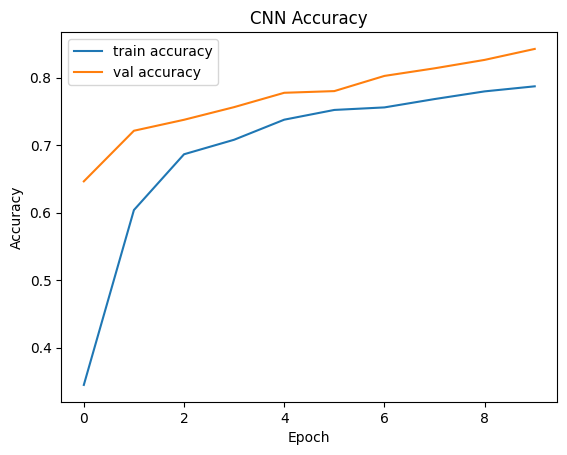

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Display Sample Training Images**

- Plots 25 sample images from the training set.
- Displays the corresponding clothing class labels.


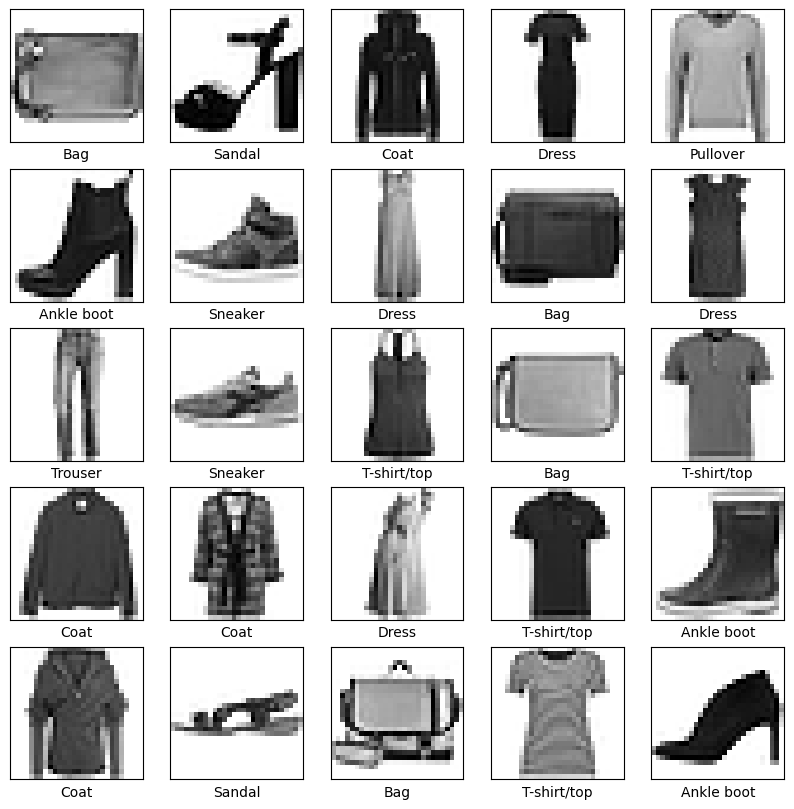

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    label_index = np.argmax(y_train[i])  # Convert one-hot back to integer
    plt.xlabel(class_names[label_index])
plt.show()

**Make Predictions and Visualize**

- Predicts labels for the test set.
- Converts predictions and actual labels from one-hot encoding to class indices.
- Displays first 10 test images with their predicted and true labels side by side.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted labels: [4 9 0 0 9 1 5 1 4 8]
True labels: [4 9 6 0 9 1 5 1 6 8]


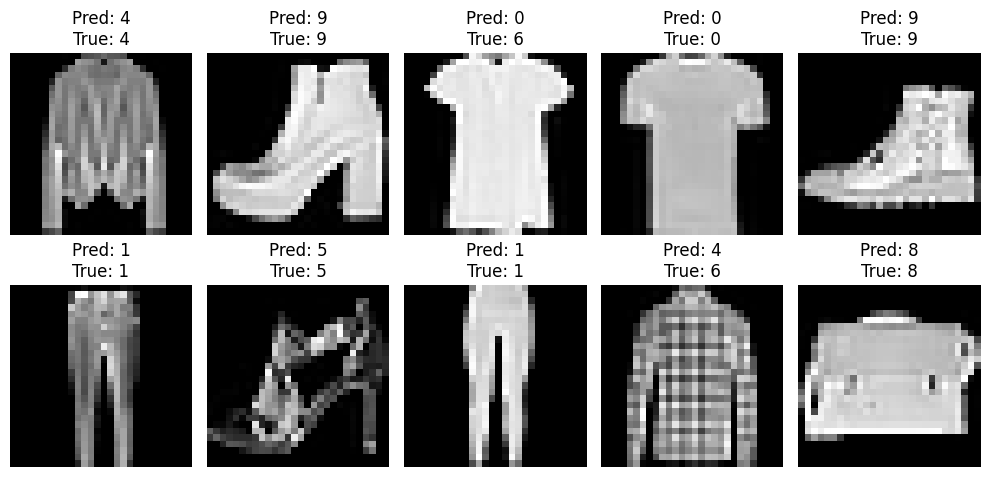

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions from one-hot encoding to labels
predicted_labels = np.argmax(predictions, axis=1)

# Print the first 10 predictions and the corresponding true labels
print("Predicted labels:", predicted_labels[:10])
print("True labels:", np.argmax(y_test, axis=1)[:10])

# Optionally, display the first 10 test images with their predicted and true labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i in range(10):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}\nTrue: {np.argmax(y_test, axis=1)[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()
